In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sympy as sy
import math
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from scipy.signal import find_peaks
m= 0.2
k = 1
x0= 1.5
v0x= 0

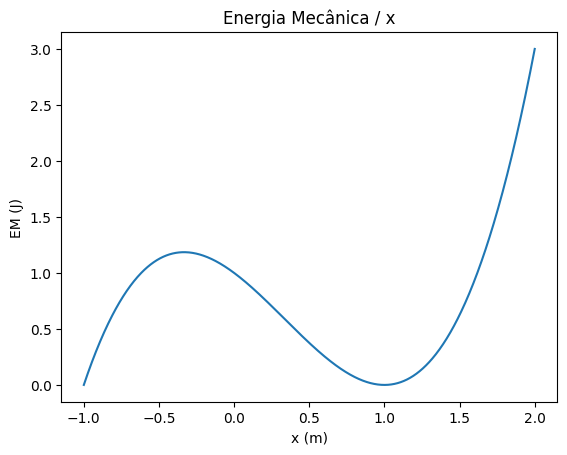

In [75]:
x = sy.symbols("x")
ep = k*((x-1)**2)*(x+1)
ep_lam = sy.lambdify(x, ep, "numpy")

x_vals = np.linspace(-1, 2, 1000)

plt.plot(x_vals, ep_lam(x_vals), linestyle="-")
plt.title("Energia Mecânica / x")
plt.xlabel("x (m)")
plt.ylabel("EM (J)")
plt.show()

In [76]:
N=100000
tfinal=5
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

em = np.zeros(N)
ep = np.zeros(N)
ecin = np.zeros(N)
ep[0] = k*((xt[0]-1)**2)*(xt[0]+1)
ecin[0] = 0.5 * m * vxt[0]**2
em[0] = ep[0] + ecin[0]

dt=tfinal/N

In [77]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [78]:
def eulercromer():
    for i in range(N-1):
        ax=(-3*k*(xt[i]**2) + 2*k*xt[i] + k)/m
        
        vxt[i+1]=vxt[i]+ax*dt
        xt[i+1]=xt[i]+vxt[i+1]*dt
        
        t[i+1]= t[i] + dt
        
        ep[i+1] = k*((xt[i+1]-1)**2)*(xt[i+1]+1)
        ecin[i+1] = 0.5 * m * vxt[i+1]**2
        em[i+1] = ep[i+1] + ecin[i+1]

        if (xt[i]<0.5 and xt[i+1]>0.5):
            print("Velocidade aos 0.5 m: " + str(vxt[i]) + "m/s")
        
    return
eulercromer()

Velocidade aos 0.5 m: 1.5806796006225707m/s
Velocidade aos 0.5 m: 1.5808669582705575m/s
Velocidade aos 0.5 m: 1.5807417935939105m/s


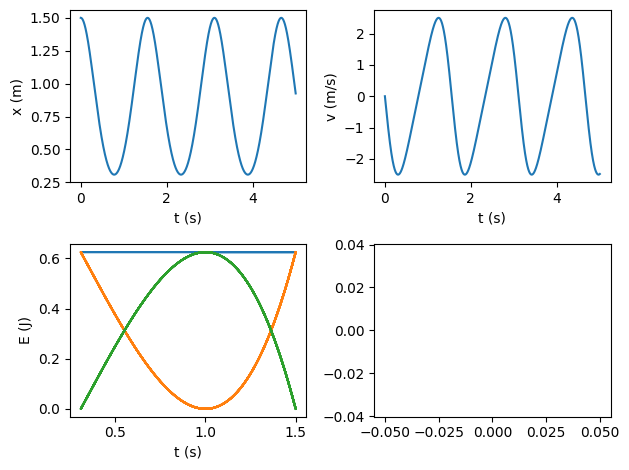

In [79]:
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t, xt, linestyle="-")
axis[0,0].set_xlabel("t (s)")
axis[0,0].set_ylabel("x (m)")
axis[0,1].plot(t, vxt, linestyle="-")
axis[0,1].set_xlabel("t (s)")
axis[0,1].set_ylabel("v (m/s)")
axis[1,0].plot(xt, em, linestyle="-")
axis[1,0].plot(xt, ep, linestyle="-")
axis[1,0].plot(xt, ecin, linestyle="-")
axis[1,0].set_xlabel("t (s)")
axis[1,0].set_ylabel("E (J)")
plt.axis('equal')
figure.tight_layout()